In [13]:
# Vector Angle Comparison (Using 2D Cross Product)

#The Goal of this code is to construct 2D geometric vectors with the goal of computing the angle between them using the 2D cross product, via 3 different Vector Method:
#1. Direct XY vectors  
#2. GPS coordinates → local ENU vectors  
#3. Boat heading + range vectors  

#Thus:
#- WHEN THE VECTORS GO TO 0 =>    Cross product = 0 → vectors are aligned (same or opposite direction)
#- OTHERWISE WHEN THE VECTORS DONT GO TO 0 => Cross product = 1 → vectors are perpendicular

# Note that All plotting is unit vectors so for X: -1 to 1 basis or for y:  1 to 0

In [14]:
import numpy as np
import matplotlib.pyplot as plt

=== Version 1: Direct XY Vectors (CROSS PRODUCT) ===
u1: [0.92847669 0.37139068]
u2: [0.89442719 0.4472136 ]
|u1 × u2| = sin(theta): 0.08304547985374006
Angle = 4.763641690726183 degrees


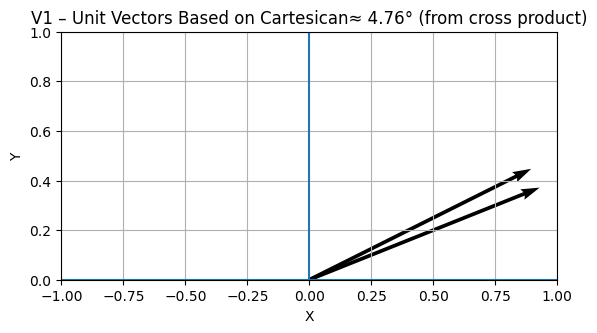

In [43]:
#V1: Direct XY vectors

#  two geometric vectors in XY (i'm assuming meters)
v1 = np.array([2.5, 1.0])
v2 = np.array([2.4, 1.2])

# normalize
u1 = v1 / np.linalg.norm(v1)
u2 = v2 / np.linalg.norm(v2)

# 2D cross product (assuming scalar z-component)
cross_z = u1[0]*u2[1] - u1[1]*u2[0]
cross_mag = np.clip(abs(cross_z), 0, 1)

# Angle (from sin(theta))
theta_deg = np.degrees(np.arcsin(cross_mag))

print("=== Version 1: Direct XY Vectors (CROSS PRODUCT) ===")
print("u1:", u1)
print("u2:", u2)
print("|u1 × u2| = sin(theta):", cross_mag)
print("Angle =", theta_deg, "degrees")

# ---------- Plot ----------
plt.figure()
plt.axhline(0)
plt.axvline(0)

# plot arrows for unit vectors
plt.quiver(0, 0, u1[0], u1[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, u2[0], u2[1], angles='xy', scale_units='xy', scale=1)

# 180-degree field of view (top half only)
plt.xlim([-1.0, 1.0])
plt.ylim([0, 1.0])
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"V1 – Unit Vectors Based on Cartesican≈ {theta_deg:.2f}° (from cross product)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()






=== V2: GPS-derived Vectors (CROSS PRODUCT) ===
u1: [0.93274627 0.36053348]
u2: [0.8864336  0.46285577]
|u1 × u2| = sin(theta): 0.11213800282140868
Angle = 6.438576786605323 degrees


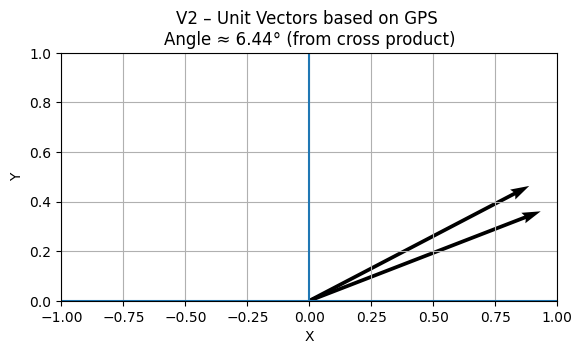

In [44]:
# --- Version 2: GPS-based vectors (Lat/Lon -> East-North) ---

def gps_to_vector(lat1, lon1, lat2, lon2):
    # Convert to radians!!!! from GPS vectors
    lat1 = np.radians(lat1); lon1 = np.radians(lon1)
    lat2 = np.radians(lat2); lon2 = np.radians(lon2)

    dlat = lat2 - lat1
    dlon = lon2 - lon1
    lat_avg = 0.5*(lat1 + lat2)

    R = 6371000  # Earth radius (m)

    dx = dlon * np.cos(lat_avg) * R   # East
    dy = dlat * R                     # North
    return np.array([dx, dy])

# Example GPS points (PLUG IN GPS POINTS HERE)
lat0, lon0 = 45.1234, -87.4321
latA, lonA = 45.1237, -87.4310
latB, lonB = 45.1241, -87.4302

v1_gps = gps_to_vector(lat0, lon0, latA, lonA)
v2_gps = gps_to_vector(lat0, lon0, latB, lonB)

# Normalize VECTOR 
u1_gps = v1_gps / np.linalg.norm(v1_gps)
u2_gps = v2_gps / np.linalg.norm(v2_gps)

# Cross product
cross_z_gps = u1_gps[0]*u2_gps[1] - u1_gps[1]*u2_gps[0]
cross_mag_gps = np.clip(abs(cross_z_gps), 0, 1)

theta_gps_deg = np.degrees(np.arcsin(cross_mag_gps))

print("=== V2: GPS-derived Vectors (CROSS PRODUCT) ===")
print("u1:", u1_gps)
print("u2:", u2_gps)
print("|u1 × u2| = sin(theta):", cross_mag_gps)
print("Angle =", theta_gps_deg, "degrees")

# ---------- Plot ----------
plt.figure()
plt.axhline(0)
plt.axvline(0)

plt.quiver(0, 0, u1_gps[0], u1_gps[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, u2_gps[0], u2_gps[1], angles='xy', scale_units='xy', scale=1)

# 180-degree field of view 
plt.xlim([-1.0, 1.0])
plt.ylim([0, 1.0])
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"V2 – Unit Vectors based on GPS \nAngle ≈ {theta_gps_deg:.2f}° (from cross product)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()







=== Version 3: Boat Heading Vectors (CROSS PRODUCT) ===
u1: [-0.57357644  0.81915204]
u2: [0.96592583 0.25881905]
|u1 × u2| = sin(theta): 0.9396926207859083
Angle = 70.0 degrees


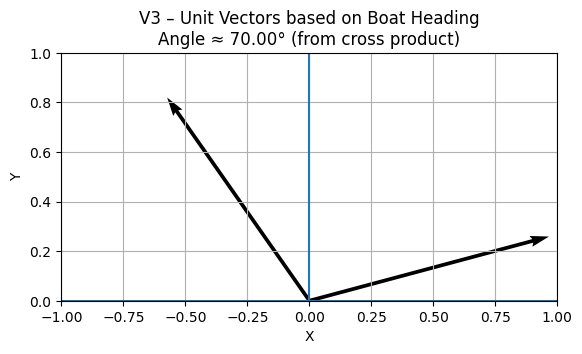

In [45]:
# --- Version 3: Boat coordinates (heading + range) ---

def bearing_to_vector(heading_deg, rng):
    #FROM BOAT VECTORS
    th = np.radians(heading_deg)
    x = rng * np.sin(th)   # East
    y = rng * np.cos(th)   # North
    return np.array([x, y])

v1_boat = bearing_to_vector(-35, 500)   # 45°, 500 m
v2_boat = bearing_to_vector(75, 500)   # 75°?, 500 m

# Normalize
u1_boat = v1_boat / np.linalg.norm(v1_boat)
u2_boat = v2_boat / np.linalg.norm(v2_boat)

# Cross product
cross_z_boat = u1_boat[0]*u2_boat[1] - u1_boat[1]*u2_boat[0]
cross_mag_boat = np.clip(abs(cross_z_boat), 0, 1)

theta_boat_deg = np.degrees(np.arcsin(cross_mag_boat))

print("=== Version 3: Boat Heading Vectors (CROSS PRODUCT) ===")
print("u1:", u1_boat)
print("u2:", u2_boat)
print("|u1 × u2| = sin(theta):", cross_mag_boat)
print("Angle =", theta_boat_deg, "degrees")

# ---------- Plot ----------
plt.figure()
plt.axhline(0)
plt.axvline(0)

plt.quiver(0, 0, u1_boat[0], u1_boat[1], angles='xy', scale_units='xy', scale=1)
plt.quiver(0, 0, u2_boat[0], u2_boat[1], angles='xy', scale_units='xy', scale=1)

# 180-degree field of view 
plt.xlim([-1.0, 1.0])
plt.ylim([0, 1.0])
plt.gca().set_aspect('equal', adjustable='box')
plt.title(f"V3 – Unit Vectors based on Boat Heading\nAngle ≈ {theta_boat_deg:.2f}° (from cross product)")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()


